In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [43]:
im_path = 'coins.png'
im_gray = cv2.imread(im_path,cv2.IMREAD_GRAYSCALE)

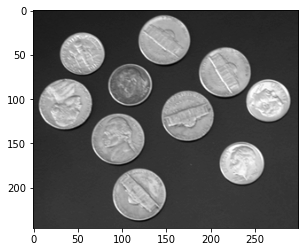

In [44]:
plt.imshow(im_gray, cmap = "gray")
plt.show()

sum: 73800.0  = res: 73800


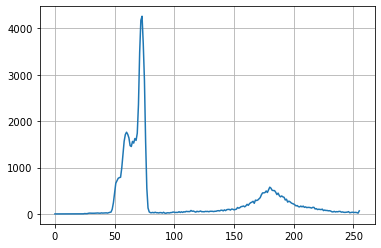

In [45]:
#histogram
#mask = None : 전체이미지를 사용하겠다. 

hist = cv2.calcHist([im_gray], channels = [0], mask = None, histSize=[256], ranges=[.0,256.0])
print("sum:", np.sum(hist), " = res:", im_gray.shape[0]*im_gray.shape[1])

plt.plot(hist)
plt.grid()
plt.show()

#x축 : 밝기값


In [46]:
#binarization

#THRESH_OTSU -> thresh = 0 값 무시.
# maxval = 255 값을 기준으로 0,1 을 return 하라 
# thres = T , im_bin : 이진화된 이미지 

thres, im_bin = cv2.threshold(im_gray, thresh = 0 , maxval =255, type = cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(thres)

126.0


In [47]:
np.unique(im_bin[:,:])

array([  0, 255], dtype=uint8)

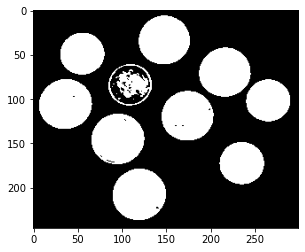

In [48]:
plt.imshow(im_bin, cmap = "gray")
plt.show()

In [54]:
#ostue could not detect one
#여기서는 오츄 를 더해주면 안된다. thres, im_bin2 = cv2.threshold(im_gray, thresh = thres - 30 , maxval = 255, type = cv2.THRESH_BINARY)

thres2, im_bin2 = cv2.threshold(im_gray, thresh = thres - 40 , maxval = 255, type = cv2.THRESH_BINARY)

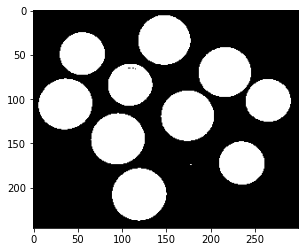

In [55]:
plt.imshow(im_bin2, cmap = "gray")
plt.show()

In [51]:
#직접 만들기 

kernel = np.ones((5,5),np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [56]:
#openCV에서 제공되는 것 사용
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print(kernel2)
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
print(kernel3)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [58]:
#한번만 사용하고 싶으면 iteration = 1 사요 ㅇ

im_erosion = cv2.erode(im_bin,kernel,iterations=1)
im_dilation = cv2.dilate(im_bin,kernel,iterations=1)

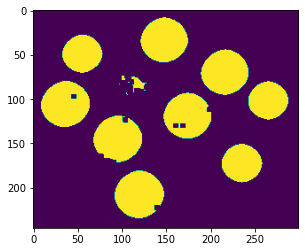

In [60]:
plt.imshow(im_erosion)


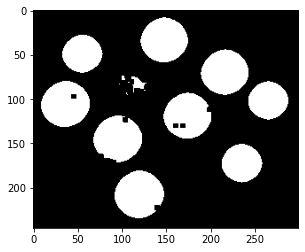

In [61]:
plt.imshow(im_erosion, cmap = "gray")

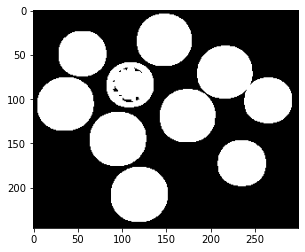

In [62]:
plt.imshow(im_dilation,cmap = "gray")

#원이 더 커졌다!

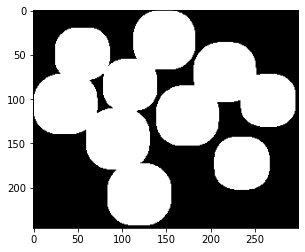

In [63]:
im_dilation = cv2.dilate(im_bin,kernel,iterations=3)
plt.imshow(im_dilation,cmap = "gray")

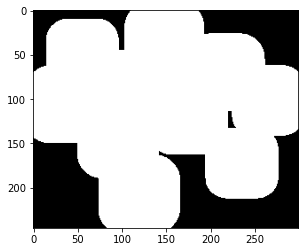

In [64]:
im_dilation = cv2.dilate(im_bin,kernel,iterations=8)
plt.imshow(im_dilation,cmap = "gray")

# kernel을 네모난 모양으로 만들었기 때문에 다음과 같은 모양으로!
# kernel에 따라 shqpe이 바뀐다. 

In [66]:
opening = cv2.morphologyEx(im_bin, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(im_bin, cv2.MORPH_CLOSE, kernel)

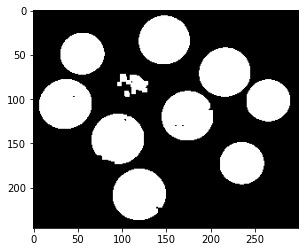

In [68]:
plt.imshow(opening, cmap = "gray")

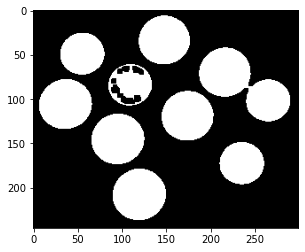

In [69]:
plt.imshow(closing, cmap = "gray")